In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import tree

# Importing and splitting the data 

In [2]:
data = np.genfromtxt("fuel_data.csv", delimiter = ',') 
X = data.T[0:7].T
Y = data.T[-1].T
#np.random.shuffle(data) 
#data = data 
#Y = np.arctan(Y)
#print Y
#print X

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state= 42)

len(data)

#X_train = X[0:300]
#X_test = X[300:len(data)]
#Y_train = Y[0:300]
#Y_test = Y[300:len(data)]

print np.shape(X_train)
print np.shape(X_test)
print np.shape(Y_train)
print np.shape(Y_test)

(235L, 7L)
(157L, 7L)
(235L,)
(157L,)


# Using cross validation for tuning the hyperparameters 

In [3]:
cv = []
d_tr = []
for d in range(1,8):
    clf = tree.DecisionTreeRegressor(criterion = 'mae',max_depth = d, random_state = 42)
    cv.append(np.mean(-cross_val_score(clf, X, Y, scoring = 'neg_mean_squared_error')))
    d_tr.append(d) 

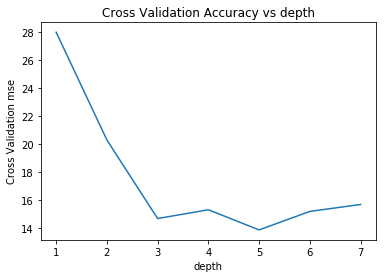

5

In [4]:
plt.plot(d_tr,cv) 
plt.title('Cross Validation Accuracy vs depth')
plt.xlabel('depth') 
plt.ylabel('Cross Validation mse') 
plt.show() 
d_tr[cv.index(min(cv))]   

# Creating the model class for regression

In [5]:
clf = tree.DecisionTreeRegressor(criterion = 'mse',max_depth = 5)

In [6]:
clf.fit(X_train,Y_train) 

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

# Getting the importance of indiviual features

In [7]:
clf.feature_importances_ 

array([ 0.62259517,  0.02485179,  0.11925522,  0.11207977,  0.00402771,
        0.11273562,  0.00445472])

# Getting the predictions

In [8]:
Y_pred = clf.predict(X_test)
Y_pred_train = clf.predict(X_train)
print Y_pred_train[20:30]
print Y_train[20:30]

[ 26.2         15.09375     16.53846154  27.26        23.63076923
  16.53846154  27.26        28.26        29.5         26.2       ]
[ 27.   16.5  14.   28.   24.   18.   28.1  27.   29.   26. ]


# MSE and R2

In [9]:
print("Mean squared error (train): %.8f"
      % mean_squared_error(Y_train,Y_pred_train))
print("R2(train): %.2f"
      % r2_score(Y_train,Y_pred_train))

Mean squared error (train): 3.34289841
R2(train): 0.94


In [10]:
print("Mean squared error (test): %.8f"
      % mean_squared_error(Y_test,Y_pred))
print("R2(test): %.2f"
      % r2_score(Y_test,Y_pred))

Mean squared error (test): 10.42550849
R2(test): 0.83


# Maximum Absolute Error

In [11]:
def max_abs_error(data1,data2):
    Y_error = []
    for i in range(len(data1)):
        Y_error.append(100*abs(data1[i] - data2[i])/data1[i])  
    return Y_error

In [12]:
MAE_test = max_abs_error(Y_test, Y_pred)
MAE_train = max_abs_error(Y_train, Y_pred_train)
print max(MAE_test)
print max(MAE_train)

57.0
21.2132352941


# Mean Absolute Error

In [13]:
print("mean_absolute_error(test): %.2f"
      % mean_absolute_error(Y_test, Y_pred)) 

print("mean_absolute_error(train): %.2f"
      % mean_absolute_error(Y_train, Y_pred_train))   

mean_absolute_error(test): 2.35
mean_absolute_error(train): 1.33
